In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier


In [23]:
credit_df  = pd.read_csv('german_credit.csv')

In [24]:
#run the loop, get the type of the column and if it is object convert it to categorical

columns = credit_df.columns
for col in columns:
    if(credit_df[col].dtype =='object'):
        credit_df[col] = pd.Categorical(credit_df[col]).codes
    

In [25]:
credit_df.sample(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
310,0,48,1,2,5381,4,4,3,4,40,0,0,1,2,1,1,0
41,0,12,1,4,1158,1,0,3,1,26,1,1,1,1,1,1,0


In [26]:
y = credit_df.pop('default')
x = credit_df

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.3)

In [30]:
decisionTree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
decisionTree.fit(X_train,y_train)
decisionTree.score(X_test,y_test)

0.7266666666666667

# Visualizing the Decision Tree

__export the tree to odt file__

In [33]:
export_graphviz(decisionTree, out_file='dec_tree.odt', feature_names=X_train.columns, filled=True)

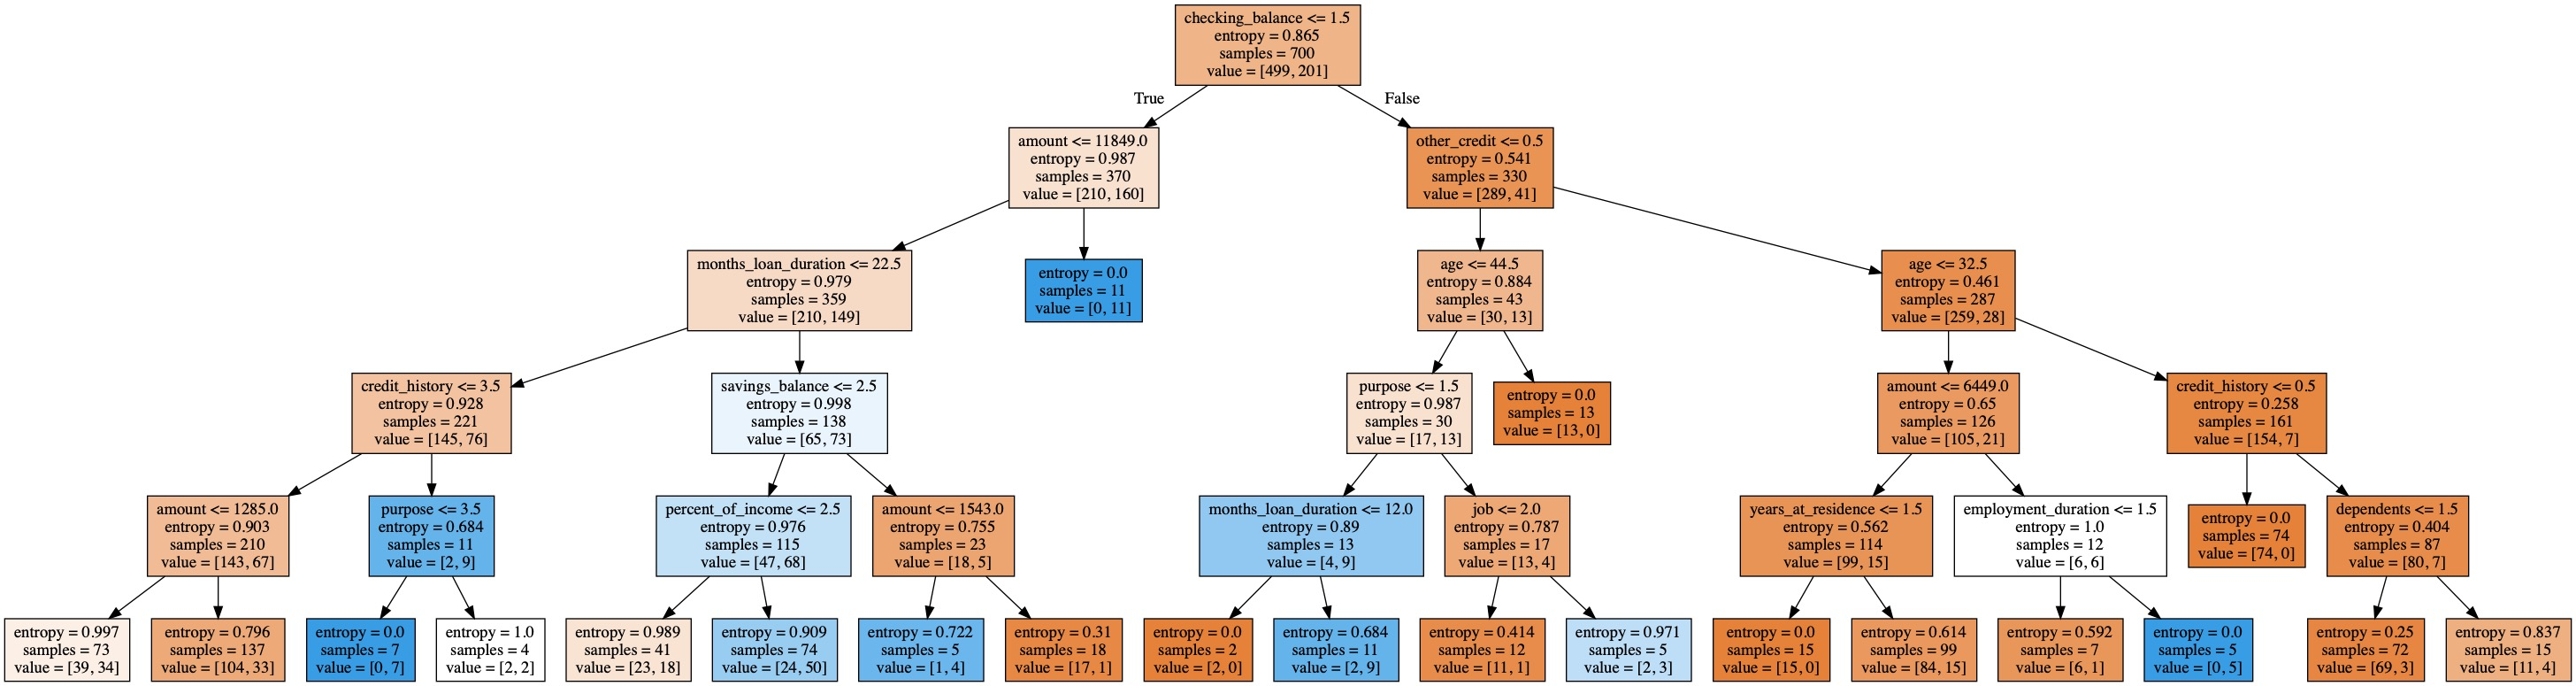

In [34]:
tree_graph = pdot.graphviz.graph_from_dot_file('dec_tree.odt')
tree_graph.write_jpg('dec_tree.png')
Image(filename='dec_tree.png')